# Simon-Mars tensor in Curzon-Chazy spacetime

This worksheet demonstrates a few capabilities of SageMath in computations regarding Curzon-Chazy spacetime. It implements the computation of the Simon-Mars tensor of Curzon-Chazy spacetime used in the article [arXiv:1412.6542](http://arxiv.org/abs/1412.6542). The corresponding tools have been developed within the  [SageManifolds](http://sagemanifolds.obspm.fr) project (version 1.2, as included in SageMath 8.2).

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.2/SM_Simon-Mars_Curzon-Chazy.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 8.2 is required to run this worksheet:

In [1]:
version()

'SageMath version 8.2, Release Date: 2018-05-05'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

## Spacetime manifold

We declare the Curzon-Chazy spacetime as a 4-dimensional Lorentzian manifold:

In [3]:
M = Manifold(4, 'M', latex_name=r'\mathcal{M}', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


<p>We introduce the coordinates $(t,r,y,\phi)$ with $y$ related to the standard <strong>Weyl-Papapetrou coordinates</strong> $(t,r,\theta,\phi)$ by $y=\cos\theta$:</p>

In [4]:
X.<t,r,y,ph> = M.chart(r't r:(0,+oo) y:(-1,1) ph:(0,2*pi):\phi') 
print(X) ; X

Chart (M, (t, r, y, ph))


Chart (M, (t, r, y, ph))

<h2>Metric tensor</h2>
<p>We declare the only parameter of the Curzon-Chazy spacetime, which is the mass $m$ as a symbolic variable:</p>

In [5]:
var('m')

m

<p>Without any loss of generality, we set $m$ to some specific value (this amounts simply to fixing some length scale):</p>

In [6]:
m = 12

Let us set the components of the spacetime metric in the coordinate frame associated with Weyl-Papapetrou coordinates:

In [7]:
g = M.metric()
g[0,0] = - exp(-2*m/r)
g[1,1] = exp(2*m/r-m^2*(1-y^2)/r^2)
g[2,2] = exp(2*m/r-m^2*(1-y^2)/r^2)*r^2/(1-y^2)
g[3,3] = exp(2*m/r)*r^2*(1-y^2)

In [8]:
g[:]

[                                 -e^(-24/r)                                           0                                           0                                           0]
[                                          0                e^(144*(y^2 - 1)/r^2 + 24/r)                                           0                                           0]
[                                          0                                           0 -r^2*e^(144*(y^2 - 1)/r^2 + 24/r)/(y^2 - 1)                                           0]
[                                          0                                           0                                           0                     -(y^2 - 1)*r^2*e^(24/r)]

<p>The Levi-Civita connection $\nabla$ associated with $g$:</p>

In [9]:
nab = g.connection() ; print(nab)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional Lorentzian manifold M


<p>As a check, we verify that the covariant derivative of $g$ with respect to $\nabla$ vanishes identically:</p>

In [10]:
nab(g).display()

nabla_g(g) = 0

<h2>Killing vector</h2>
<p>The default vector frame on the spacetime manifold is the coordinate basis associated with Weyl-Papapetrou coordinates:</p>

In [11]:
M.default_frame() is X.frame()

True

In [12]:
X.frame()

Coordinate frame (M, (d/dt,d/dr,d/dy,d/dph))

<p>Let us consider the first vector field of this frame:</p>

In [13]:
xi = X.frame()[0] ; xi

Vector field d/dt on the 4-dimensional Lorentzian manifold M

In [14]:
print(xi)

Vector field d/dt on the 4-dimensional Lorentzian manifold M


<p>The 1-form associated to it by metric duality is</p>

In [15]:
xi_form = xi.down(g)
xi_form.set_name('xi_form', r'\underline{\xi}')
print(xi_form) ; xi_form.display()

1-form xi_form on the 4-dimensional Lorentzian manifold M


xi_form = -e^(-24/r) dt

<p>Its covariant derivative is</p>

In [16]:
nab_xi = nab(xi_form)
print(nab_xi) ; nab_xi.display()

Tensor field nabla_g(xi_form) of type (0,2) on the 4-dimensional Lorentzian manifold M


nabla_g(xi_form) = -12*e^(-24/r)/r^2 dt*dr + 12*e^(-24/r)/r^2 dr*dt

<p>Let us check that the Killing equation is satisfied:</p>

In [17]:
nab_xi.symmetrize().display()

0

<p>Equivalently, we check that the Lie derivative of the metric along $\xi$ vanishes:</p>

In [18]:
g.lie_der(xi).display()

0

<p>Thank to Killing equation, $\nabla_g \underline{\xi}$ is antisymmetric. We may therefore define a 2-form by $F := - \nabla_g \xi$. Here we enforce the antisymmetry by calling the function <span style="font-family: courier new,courier;">antisymmetrize()</span> on <span style="font-family: courier new,courier;">nab_xi</span>:</p>

In [19]:
F = - nab_xi.antisymmetrize()
F.set_name('F')
print(F)
F.display()

2-form F on the 4-dimensional Lorentzian manifold M


F = 12*e^(-24/r)/r^2 dt/\dr

<p>We check that</p>

In [20]:
F == - nab_xi

True

<p>The squared norm of the Killing vector is</p>

In [21]:
lamb = - g(xi,xi)
lamb.set_name('lambda', r'\lambda')
print(lamb)
lamb.display()

Scalar field lambda on the 4-dimensional Lorentzian manifold M


lambda: M --> R
   (t, r, y, ph) |--> e^(-24/r)

<p>Instead of invoking $g(\xi,\xi)$, we could have evaluated $\lambda$ by means of the 1-form $\underline{\xi}$ acting on the vector field $\xi$:</p>

In [22]:
lamb == - xi_form(xi)

True

<p>or we could have used index notation in the form $\lambda = - \xi_a \xi^a$:</p>

In [23]:
lamb == - ( xi_form['_a']*xi['^a'] )

True

<h2>Curvature</h2>
<p>The Riemann curvature tensor associated with $g$ is</p>

In [24]:
Riem = g.riemann()
print(Riem)

Tensor field Riem(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


<p>The component $R^0_{\ \, 101} = R^t_{\ \, rtr}$ is</p>

In [25]:
Riem[0,1,0,1]

24*(r^2 - 72*y^2 - 12*r + 72)/r^5

<p>while the component $R^2_{\ \, 323} = R^y_{\ \, \phi y \phi}$ is</p>

In [26]:
Riem[2,3,2,3]

24*(72*y^4*e^(144/r^2) - (r^2 - 12*r + 144)*y^2*e^(144/r^2) + (r^2 - 12*r + 72)*e^(144/r^2))*e^(-144*y^2/r^2)/r^3

<p>All the non-vanishing components of the Riemann tensor, taking into account the antisymmetry on the last two indices:</p>

In [27]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = 24*(r^2 - 72*y^2 - 12*r + 72)/r^5 
Riem(g)^t_r,t,y = 1728*y/r^4 
Riem(g)^t_y,t,r = 1728*y/r^4 
Riem(g)^t_y,t,y = 12*(r^2 - 144*y^2 - 12*r + 144)/(r^3*y^2 - r^3) 
Riem(g)^t_ph,t,ph = 12*((r - 12)*y^2*e^(144/r^2) - (r - 12)*e^(144/r^2))*e^(-144*y^2/r^2)/r^2 
Riem(g)^r_t,t,r = -24*(72*y^2*e^(144/r^2) - (r^2 - 12*r + 72)*e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^5 
Riem(g)^r_t,t,y = 1728*y*e^(-144*y^2/r^2 - 48/r + 144/r^2)/r^4 
Riem(g)^r_y,r,y = 12*(r - 12)/(r^2*y^2 - r^2) 
Riem(g)^r_ph,r,ph = -12*(144*y^4*e^(144/r^2) - (r^2 - 12*r + 288)*y^2*e^(144/r^2) + (r^2 - 12*r + 144)*e^(144/r^2))*e^(-144*y^2/r^2)/r^3 
Riem(g)^r_ph,y,ph = 1728*(y^3*e^(144/r^2) - y*e^(144/r^2))*e^(-144*y^2/r^2)/r^2 
Riem(g)^y_t,t,r = -1728*(y^3*e^(144/r^2) - y*e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^6 
Riem(g)^y_t,t,y = 12*(144*y^2*e^(144/r^2) - (r^2 - 12*r + 144)*e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^5 
Riem(g)^y_r,r,y = 12*(r - 12)/r^4 
Riem(g)^y_ph,r,ph = -1728*(y^5*e^(144/r^2) - 2*y^3*e^(144/r^2) + y*e^(144/r^2))*e^(-144*y^2/r^2)/r^4 
Riem(g)^y_ph,y,ph = 24*(72*y^4*e^(144/r^2) - (r^2 - 12*r + 144)*y^2*e^(144/r^2) + (r^2 - 12*r + 72)*e^(144/r^2))*e^(-144*y^2/r^2)/r^3 
Riem(g)^ph_t,t,ph = -12*(r - 12)*e^(-144*y^2/r^2 - 48/r + 144/r^2)/r^4 
Riem(g)^ph_r,r,ph = 12*(r^2 - 144*y^2 - 12*r + 144)/r^5 
Riem(g)^ph_r,y,ph = 1728*y/r^4 
Riem(g)^ph_y,r,ph = 1728*y/r^4 
Riem(g)^ph_y,y,ph = 24*(r^2 - 72*y^2 - 12*r + 72)/(r^3*y^2 - r^3)

<p>The Ricci tensor:</p>

In [28]:
Ric = g.ricci()
print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M


<p>Let us check that the Curzon-Chazy metric is a solution of the<strong> vacuum Einstein equation</strong>:</p>

In [29]:
Ric.display()

Ric(g) = 0

<p><span id="cell_outer_24">The Weyl conformal curvature tensor is<br /></span></p>

In [30]:
C = g.weyl()
print(C)

Tensor field C(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


<p>Let us exhibit two of its components $C^0_{\ \, 123}$ and $C^0_{\ \, 101}$:</p>

In [31]:
C[0,1,2,3]

0

In [32]:
C[0,1,0,1]

24*(r^2 - 72*y^2 - 12*r + 72)/r^5

<p>To form the Mars-Simon tensor, we need the fully covariant (type-(0,4) tensor) form of the Weyl tensor (i.e. $C_{\alpha\beta\mu\nu} = g_{\alpha\sigma} C^\sigma_{\ \, \beta\mu\nu}$); we get it by lowering the first index with the metric:</p>

In [33]:
Cd = C.down(g)
print(Cd)

Tensor field of type (0,4) on the 4-dimensional Lorentzian manifold M


<p>The (monoterm) symmetries of this tensor are those inherited from the Weyl tensor, i.e. the antisymmetry on the last two indices (position 2 and 3, the first index being at position 0):</p>

In [34]:
Cd.symmetries()

no symmetry; antisymmetry: (2, 3)


<p>Actually, Cd is also antisymmetric with respect to the first two indices (positions 0 and 1), as we can check:</p>

In [35]:
Cd == Cd.antisymmetrize(0,1)

True

<p>To take this symmetry into account explicitely, we set</p>

In [36]:
Cd = Cd.antisymmetrize(0,1)

<p>Hence we have now</p>

In [37]:
Cd.symmetries()

no symmetry; antisymmetries: [(0, 1), (2, 3)]


<h2>Simon-Mars tensor</h2>
<p>The Simon-Mars tensor with respect to the Killing vector $\xi$ is a rank-3 tensor introduced by Marc Mars in 1999 (<a href="http://iopscience.iop.org/0264-9381/16/7/323/">Class. Quantum Grav. <strong>16</strong>, 2507</a>). It has the remarkable property to vanish identically if, and only if, the spacetime $(\mathcal{M},g)$ is locally isometric to a Kerr spacetime.</p>
<p>Let us evaluate the Simon-Mars tensor by following the formulas given in Mars' article. The starting point is the self-dual complex 2-form associated with the Killing 2-form $F$, i.e. the object $\mathcal{F} := F + i \, {}^* F$, where ${}^*F$ is the Hodge dual of $F$:</p>

In [38]:
FF = F + I * F.hodge_dual(g)
FF.set_name('FF', r'\mathcal{F}')
print(FF) ; FF.display()

2-form FF on the 4-dimensional Lorentzian manifold M


FF = 12*e^(-24/r)/r^2 dt/\dr - 12*I dy/\dph

<p>Let us check that $\mathcal{F}$ is self-dual, i.e. that it obeys ${}^* \mathcal{F} = -i \mathcal{F}$:</p>

In [39]:
FF.hodge_dual(g) == - I * FF

True

<p>Let us form the right self-dual of the Weyl tensor as follows</p>
<p>$$\mathcal{C}_{\alpha\beta\mu\nu} = C_{\alpha\beta\mu\nu} + \frac{i}{2} \epsilon^{\rho\sigma}_{\ \ \ \mu\nu} \, C_{\alpha\beta\rho\sigma}$$</p>
<p>where $\epsilon^{\rho\sigma}_{\ \ \ \mu\nu}$ is associated to the Levi-Civita tensor $\epsilon_{\rho\sigma\mu\nu}$ and is obtained by</p>

In [40]:
eps = g.volume_form(2)  # 2 = the first 2 indices are contravariant
print(eps)
eps.symmetries()

Tensor field of type (2,2) on the 4-dimensional Lorentzian manifold M
no symmetry; antisymmetries: [(0, 1), (2, 3)]


<p>The right self-dual Weyl tensor is then:</p>

In [41]:
CC = Cd + I/2*( eps['^rs_..']*Cd['_..rs'] )
CC.set_name('CC', r'\mathcal{C}') ; print(CC)

Tensor field CC of type (0,4) on the 4-dimensional Lorentzian manifold M


In [42]:
CC.symmetries()

no symmetry; antisymmetries: [(0, 1), (2, 3)]


In [43]:
CC[0,1,2,3]

(24*I*r^2 - 1728*I*y^2 - 288*I*r + 1728*I)/r^3

<p>The Ernst 1-form $\sigma_\alpha = 2 \mathcal{F}_{\mu\alpha} \, \xi^\mu$ (0 = contraction on the first index of $\mathcal{F}$):</p>

In [44]:
sigma = 2*FF.contract(0, xi)

<p>Instead of invoking the function <span style="font-family: courier new,courier;">contract()</span>, we could have used the index notation to denote the contraction:</p>

In [45]:
sigma == 2*( FF['_ma']*xi['^m'] )

True

In [46]:
sigma.set_name('sigma', r'\sigma')
print(sigma) ; sigma.display()

1-form sigma on the 4-dimensional Lorentzian manifold M


sigma = 24*e^(-24/r)/r^2 dr

<p>The symmetric bilinear form $\gamma = \lambda \, g + \underline{\xi}\otimes\underline{\xi}$:</p>

In [47]:
gamma = lamb*g + xi_form * xi_form
gamma.set_name('gamma', r'\gamma')
print(gamma) ; gamma.display()

Field of symmetric bilinear forms gamma on the 4-dimensional Lorentzian manifold M


gamma = e^(144*y^2/r^2 - 144/r^2) dr*dr - r^2*e^(144*y^2/r^2)/(y^2*e^(144/r^2) - e^(144/r^2)) dy*dy + (-r^2*y^2 + r^2) dph*dph

<h3>Final computation leading to the Simon-Mars tensor:</h3>
<p>The first part of the Simon-Mars tensor is</p>
<p>$$ S^{(1)}_{\alpha\beta\gamma} = 4 \mathcal{C}_{\mu\alpha\nu\beta} \, \xi^\mu \, \xi^\nu \, \sigma_\gamma$$</p>

In [48]:
S1 = 4*( CC.contract(0,xi).contract(1,xi) ) * sigma
print(S1)

Tensor field of type (0,3) on the 4-dimensional Lorentzian manifold M


<p>The second part is the tensor</p>
<p>$$ S^{(2)}_{\alpha\beta\gamma} = - \gamma_{\alpha\beta} \, \mathcal{C}_{\rho\gamma\mu\nu} \, \xi^\rho \, \mathcal{F}^{\mu\nu}$$</p>
<p>which we compute by using the index notation to denote the contractions:</p>

In [49]:
FFuu = FF.up(g)
xiCC = CC['_.r..']*xi['^r']
S2 = gamma * ( xiCC['_.mn']*FFuu['^mn'] )
print(S2)

Tensor field of type (0,3) on the 4-dimensional Lorentzian manifold M


In [50]:
S2.symmetries()

symmetry: (0, 1); no antisymmetry


<p>The Mars-Simon tensor with respect to $\xi$ is obtained by antisymmetrizing $S^{(1)}$ and $S^{(2)}$ on their last two indices and adding them:</p>
<div>$$ S_{\alpha\beta\gamma} = S^{(1)}_{\alpha[\beta\gamma]} + S^{(2)}_{\alpha[\beta\gamma]}$$</div>

<p>We use the index notation for the antisymmetrization:</p>

In [51]:
S1A = S1['_a[bc]']
S2A = S2['_a[bc]']

<p>An equivalent writing would have been (the last two indices being in position 1 and 2):</p>

In [52]:
# S1A = S1.antisymmetrize(1,2)
# S2A = S2.antisymmetrize(1,2)

<p>The Simon-Mars tensor is</p>

In [53]:
S = S1A + S2A
S.set_name('S') ; print(S)
S.symmetries()

Tensor field S of type (0,3) on the 4-dimensional Lorentzian manifold M
no symmetry; antisymmetry: (1, 2)


In [54]:
S.display()

S = 41472*y*e^(-48/r)/r^6 dr*dr*dy - 41472*y*e^(-48/r)/r^6 dr*dy*dr - 41472*e^(-48/r)/r^5 dy*dr*dy + 41472*e^(-48/r)/r^5 dy*dy*dr + 41472*(y^4*e^(144/r^2) - 2*y^2*e^(144/r^2) + e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^5 dph*dr*dph - 41472*(y^3*e^(144/r^2) - y*e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^4 dph*dy*dph - 41472*(y^4*e^(144/r^2) - 2*y^2*e^(144/r^2) + e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^5 dph*dph*dr + 41472*(y^3*e^(144/r^2) - y*e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^4 dph*dph*dy

In [55]:
S.display_comp()

S_r,r,y = 41472*y*e^(-48/r)/r^6 
S_r,y,r = -41472*y*e^(-48/r)/r^6 
S_y,r,y = -41472*e^(-48/r)/r^5 
S_y,y,r = 41472*e^(-48/r)/r^5 
S_ph,r,ph = 41472*(y^4*e^(144/r^2) - 2*y^2*e^(144/r^2) + e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^5 
S_ph,y,ph = -41472*(y^3*e^(144/r^2) - y*e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^4 
S_ph,ph,r = -41472*(y^4*e^(144/r^2) - 2*y^2*e^(144/r^2) + e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^5 
S_ph,ph,y = 41472*(y^3*e^(144/r^2) - y*e^(144/r^2))*e^(-144*y^2/r^2 - 48/r)/r^4

<p>Hence the Simon-Mars tensor is not zero: the Curzon-Chazy spacetime is not locally isomorphic to the Kerr spacetime.</p>
<h3>Computation of the Simon-Mars scalars</h3>
<p>First we form the "square" of the Simon-Mars tensor:</p>

In [56]:
Su = S.up(g)
print(Su)

Tensor field of type (3,0) on the 4-dimensional Lorentzian manifold M


In [57]:
SS = S['_ijk']*Su['^ijk']
print(SS)

Scalar field on the 4-dimensional Lorentzian manifold M


In [58]:
SS.display()

M --> R
(t, r, y, ph) |--> -6879707136*(y^2*e^(432/r^2) - e^(432/r^2))*e^(-432*y^2/r^2 - 168/r)/r^14

In [59]:
SSE=SS.expr()

<p>Then we take the real and imaginary part of this compex scalar field. Because this spacetime is spherically symmetric, we expect that the imaginary part vanishes.</p>

In [60]:
SS1 = real(SSE) ; SS1

-6879707136*(y^2*e^(432/r^2) - e^(432/r^2))*e^(-432*y^2/r^2 - 168/r)/r^14

In [61]:
SS2 = imag(SSE) ; SS2

0

<p>Furthermore we scale those scalars by the ADM mass of the Curzon-Chazy spacetime, which corresponds to $m$:</p>

In [62]:
SS1ad = m^6*SS1 ; SS1ad

-20542695432781824*(y^2*e^(432/r^2) - e^(432/r^2))*e^(-432*y^2/r^2 - 168/r)/r^14

<p>And we take the log of this quantity</p>

In [63]:
lSS1ad = log(SS1ad,10) ; lSS1ad

log(-20542695432781824*(y^2*e^(432/r^2) - e^(432/r^2))*e^(-432*y^2/r^2 - 168/r)/r^14)/log(10)

<p>Then we plot the value of this quantity as a function of $\rho = x = r \sqrt{1-y^2}$ and $z = r y$, thereby producing Figure 10 of <a href="http://arxiv.org/abs/1412.6542">arXiv:1412.6542</a>:</p>

In [64]:
var('x z')
lSS1xzad = lSS1ad.subs(r=sqrt(x^2+z^2), 
                       y = z/sqrt(x^2+z^2)).simplify_full()
lSS1xzad

log(20542695432781824*x^2*e^(-432*z^2/(x^4 + 2*x^2*z^2 + z^4) - 168/sqrt(x^2 + z^2) + 432/(x^2 + z^2))/(x^16 + 8*x^14*z^2 + 28*x^12*z^4 + 56*x^10*z^6 + 70*x^8*z^8 + 56*x^6*z^10 + 28*x^4*z^12 + 8*x^2*z^14 + z^16))/log(10)

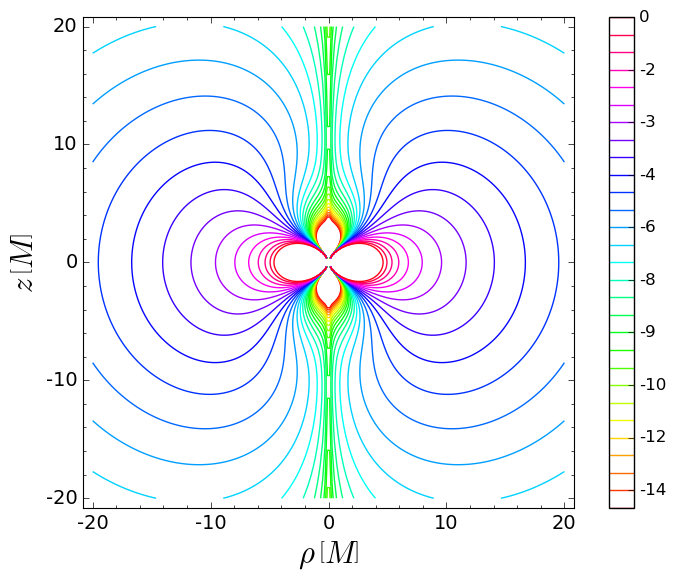

In [65]:
S1CC1 = contour_plot(lSS1xzad, (x,-20,20), (z,-20,20), plot_points=200, 
                     fill=False, cmap='hsv', linewidths=1, 
                     contours=(-14,-13.5,-13,-12.5,-12,-11.5,-11,
                               -10.5,-10,-9.5,-9,-8.5,-8,-7.5,-7,
                               -6.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,
                               -2,-1.5,-1,-0.5,0), 
                     colorbar=True, colorbar_spacing='uniform', 
                     colorbar_format='%1.f', 
                     axes_labels=(r"$\rho\,\left[M\right]$", 
                                  r"$z\,\left[M\right]$"), 
                     fontsize=14)
S1CC1

We also a viewer for 3D plots (use `'threejs'` or `'jmol'` for interactive 3D graphics):

In [66]:
viewer3D = 'tachyon' # must be 'threejs', 'jmol', 'tachyon' or None (default)

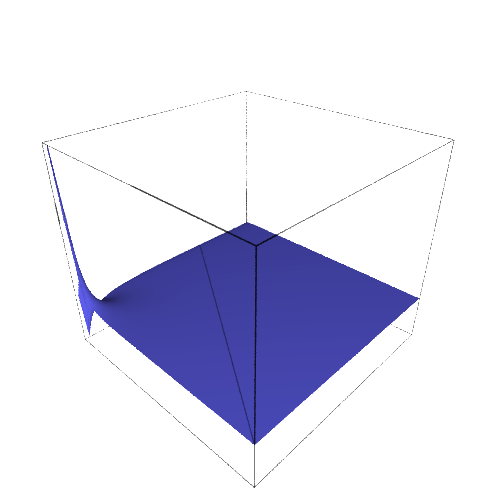

In [67]:
plot3d(lSS1xzad, (x,0.12,20), (z,0.12,20), viewer=viewer3D, 
       aspect_ratio=[1,1,0.05], plot_points=100,
       axes_labels=['rho', 'z', 'log(beta)'])